In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import numpy as np
from plotManager import plotManager
DATASET_PATH = "./data/2_bike_rental_dataset_preprocessed.csv"

## Create train and test datasets

In [2]:
df = pd.read_csv(DATASET_PATH, index_col="date", parse_dates=True)
df.head()
columns = df.columns
columns = columns.drop("rentals")
columns = columns.drop("instant")

print(columns)
X = df[columns]
y = df["rentals"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=20, shuffle=False)

Index(['year', 'workingday', 'temp', 'humidity', 'windspeed', 'season_1',
       'season_2', 'season_3', 'season_4', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weather_1', 'weather_2',
       'weather_3', 'weather_4', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')


In [7]:
regressor_random_forest = RandomForestRegressor(n_estimators=10, random_state=0)
regressor_random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [9]:
y_pred = regressor_random_forest.predict(X_test)
y_pred

array([ 82.9, 101. ,  14. , ..., 124.5,  87.2,  48.7])

In [10]:
print("Final Model")
print("Mean absolute error: " + str(metrics.mean_absolute_error(y_test, y_pred)))
print("Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred)))
print("Root mean square error: " + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("Mean absolute percentage error: " + str(metrics.mean_absolute_percentage_error(y_test, y_pred)))
print("Max error: " + str(metrics.max_error(y_test, y_pred)))

Final Model
Mean absolute error: 52.56407706305879
Mean squared error: 5995.174146481789
Root mean square error: 77.42850990740935
Mean absolute percentage error: 0.47594484534005166
Max error: 450.5


# Searching for optimal hyperparameters

In [14]:
n_estimators = [x for x in range(10,300,30)]
max_depth = [x for x in range(10,200,30)]
min_samples_split = [2, 5, 10, 20]
min_samples_leaf = [1, 2, 4, 8]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 40, 70, 100, 130, 160, 190, 220, 250, 280], 'max_depth': [10, 40, 70, 100, 130, 160, 190], 'min_samples_split': [2, 5, 10, 20], 'min_samples_leaf': [1, 2, 4, 8], 'bootstrap': [True, False]}


In [15]:
rf_base = RandomForestRegressor()
random_forest_random = RandomizedSearchCV(estimator = rf_base, param_distributions=random_grid, n_iter=10)
random_forest_random.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 40, 70, 100, 130, 160,
                                                      190],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [10, 40, 70, 100, 130,
                                                         160, 190, 220, 250,
                                                         280]})

In [16]:
random_forest_random.best_params_

{'n_estimators': 70,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 70,
 'bootstrap': True}

# Random Forest Model using Best Parameters

In [17]:
random_forest_opt = RandomForestRegressor(n_estimators=70, min_samples_split=5, min_samples_leaf=2, max_depth=70 ,random_state = 10, bootstrap=True)
random_forest_opt.fit(X_train, y_train)

RandomForestRegressor(max_depth=70, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=70, random_state=10)

In [18]:
y_pred = random_forest_opt.predict(X_test)
y_pred

array([ 73.71876984,  49.98136054,  13.57723923, ..., 101.79722789,
        93.04571429,  51.80264533])

## Performance Evaluation

In [19]:
print("Final Model")
print("Mean absolute error: " + str(metrics.mean_absolute_error(y_test, y_pred)))
print("Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred)))
print("Root mean square error: " + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("Mean absolute percentage error: " + str(metrics.mean_absolute_percentage_error(y_test, y_pred)))
print("Max error: " + str(metrics.max_error(y_test, y_pred)))

Final Model
Mean absolute error: 51.7738177596425
Mean squared error: 5659.921302678701
Root mean square error: 75.23244846925229
Mean absolute percentage error: 0.5085454878665094
Max error: 429.91080498866216


## Prediction Result

In [20]:
new_df=y_test.copy()
new_df = new_df.to_frame()
new_df['predicted_rentals'] = y_pred
new_df = new_df.sort_index()
new_df

,rentals,predicted_rentals
date,,
2012-06-24 03:00:00,60,73.718770
2012-06-24 04:00:00,13,49.981361
2012-06-24 05:00:00,8,13.577239
2012-06-24 06:00:00,25,75.311752
2012-06-24 07:00:00,71,105.173628
...,...,...
2012-12-31 19:00:00,119,188.036049
2012-12-31 20:00:00,89,149.643771
2012-12-31 21:00:00,90,101.797228


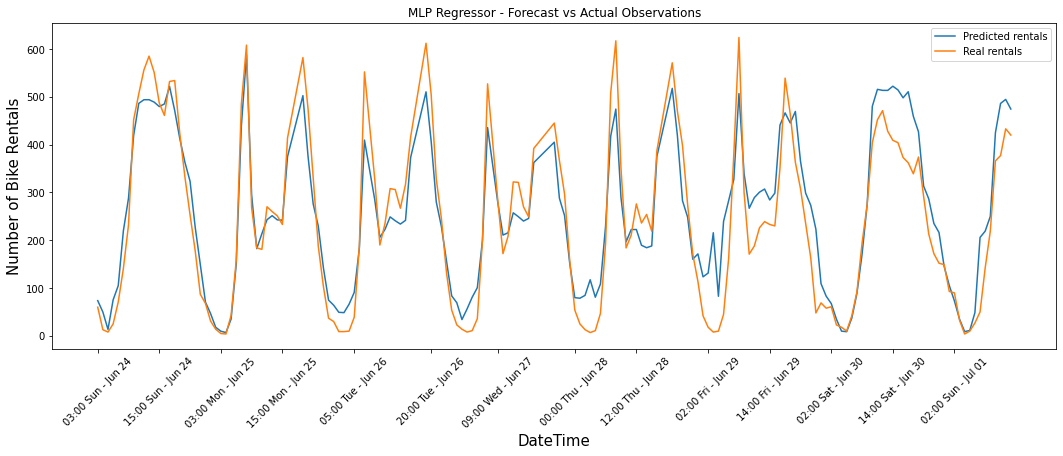

In [21]:
plotMan = plotManager(new_df)
plotMan.forecast_plot(new_df)